## Electric vehicles in Delaware
Peter Attia, [petermattia.com](http://petermattia.com)

Last updated October 22, 2017

This study

Data: https://data.delaware.gov/Energy-and-Environment/State-Rebates-for-Alternative-Fuel-Vehicles/8z8z-di7f

Downloaded on October 22, 2017 (data last updated October 2, 2017)

More information:

### Imports

In [15]:
%matplotlib inline
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from collections import Counter
import seaborn as sns
sns.set()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Also, I use a custom hisogram function that centers the x-label:

In [5]:
def histogram(dist):
    """
    Wrapper function to get MATLAB-like histogram() functionality
    """
    plt.hist(dist, bins=np.arange(min(dist)-0.5, max(dist)+1.5, 1))

### Load the `rebates` dataset

In [6]:
rebates = pd.read_csv('State_Rebates_for_Alternative-Fuel_Vehicles.csv')
rebates

,Award Number,Rebate Amount,City,State,County,Zip,Age,Gender,Date of Purchase,Dealership,Vehicle Type,Make,Model,Year,Lease?,Gasoline Emissions,Alt-Fuel Emissions
0,CVR071501,$2200.00,Hockessin,DE,New Castle,19707,81.0,M,07/20/2015,Sheridan Ford,Plug-in Hybrid,Ford,Fusion Energi,2016,No,14815.0,6575.0
1,CVR071502,$2200.00,Wilmington,DE,New Castle,19809,47.0,M,07/20/2015,Porter Ford,Plug-in Hybrid,Ford,C-Max Energi,2015,Yes,14815.0,6575.0
2,CVR071503,$2200.00,Wilmington,DE,New Castle,19810,47.0,M,07/22/2015,Darcars of Lanham Severn. Inc.,Electric,Ford,Focus Electric,2015,Yes,14815.0,5539.0
3,CVR071504,$2200.00,Wilmington,DE,New Castle,19808,66.0,M,07/20/2015,Sheridan Ford,Plug-in Hybrid,Ford,C-Max Energi,2015,Yes,14815.0,6575.0
4,CVR071505,$2200.00,New Castle,DE,New Castle,19720,51.0,M,07/24/2015,Sheridan Ford,Plug-in Hybrid,Ford,Fusion Energi,2015,Yes,14815.0,6575.0
5,CVR071506,$2200.00,Milton,DE,Sussex,19968,78.0,M,07/24/2015,Nucar Lewes Automall,Plug-in Hybrid,Chevrolet,Volt,2015,No,14815.0,6575.0
6,CVR081507,$2200.00,Magnolia,DE,Kent,19962,51.0,F,07/31/2015,Willis Ford,Plug-in Hybrid,Ford,C-Max Energi,2015,Yes,14815.0,6575.0
7,CVR081508,$2200.00,Wilmington,DE,New Castle,19810,47.0,M,08/06/2015,Nucar Chevrolet,Plug-in Hybrid,Chevrolet,Volt,2015,Yes,14815.0,6575.0
8,CVR081509,$2200.00,Dover,DE,Kent,19904,62.0,M,07/31/2015,Willis Ford,Plug-in Hybrid,Ford,C-Max Energi,2015,No,14815.0,6575.0
9,CVR081510,$2200.00,Newark,DE,New Castle,19711,72.0,M,07/31/2015,Porter Ford,Plug-in Hybrid,Ford,Fusion Energi,2015,Yes,14815.0,6575.0


(<matplotlib.text.Text at 0x11a191f28>, <matplotlib.text.Text at 0x11a1a0630>)

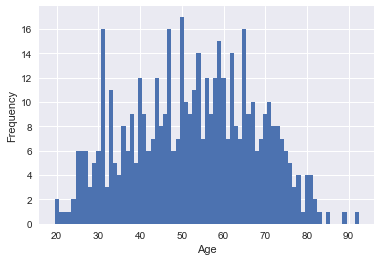

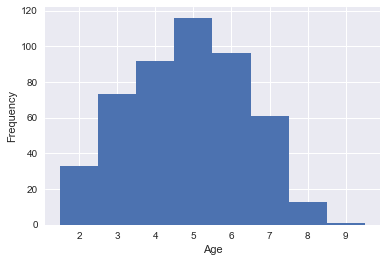

In [7]:
cleaned_ages = [x for x in rebates["Age"].values if str(x) != 'nan']
histogram(cleaned_ages)
plt.xlabel('Age'),plt.ylabel('Frequency')

plt.figure()
cleaned_ages = [x for x in rebates["Age"].values//10 if str(x) != 'nan']
histogram(cleaned_ages)
plt.xlabel('Age'),plt.ylabel('Frequency')

In [8]:
Counter(rebates["Make"])

Counter({'Audi': 5,
         'BMW': 18,
         'BMW ': 7,
         'Cadillac': 1,
         'Chevrolet': 89,
         'FORD': 1,
         'Ford': 268,
         'Ford ': 2,
         'Hyundai': 3,
         'Kia': 1,
         'Mercedes-Benz': 2,
         'Nissan': 20,
         'Porsche ': 2,
         'Tesla': 69,
         'Tesla ': 1,
         'Toyota': 22,
         'Volvo': 2,
         'ford': 2})

In [9]:
rebates["Make"] = rebates["Make"].str.title()
rebates["Make"] = rebates["Make"].str.replace(" ","")
rebates["Make"] = rebates["Make"].str.replace("Bmw","BMW")
Counter(rebates["Make"])

Counter({'Audi': 5,
         'BMW': 25,
         'Cadillac': 1,
         'Chevrolet': 89,
         'Ford': 273,
         'Hyundai': 3,
         'Kia': 1,
         'Mercedes-Benz': 2,
         'Nissan': 20,
         'Porsche': 2,
         'Tesla': 70,
         'Toyota': 22,
         'Volvo': 2})

In [10]:
Counter(rebates["County"])

Counter({'Kent': 76, 'Kent ': 1, 'New Castle': 330, 'Sussex': 108})

In [11]:
rebates["County"] = rebates["County"].str.strip()
Counter(rebates["County"])

Counter({'Kent': 77, 'New Castle': 330, 'Sussex': 108})

In [12]:
Counter(rebates["Zip"])

Counter({19701: 14,
         19702: 20,
         19703: 2,
         19707: 14,
         19709: 38,
         19710: 2,
         19711: 42,
         19713: 12,
         19720: 15,
         19731: 1,
         19732: 1,
         19734: 14,
         19802: 6,
         19803: 27,
         19804: 9,
         19805: 18,
         19806: 11,
         19807: 22,
         19808: 27,
         19809: 10,
         19810: 18,
         19901: 20,
         19902: 1,
         19904: 20,
         19930: 3,
         19933: 5,
         19934: 9,
         19938: 7,
         19939: 3,
         19940: 1,
         19943: 3,
         19945: 1,
         19947: 3,
         19950: 1,
         19953: 1,
         19955: 1,
         19956: 2,
         19958: 24,
         19960: 2,
         19962: 4,
         19963: 7,
         19966: 29,
         19968: 8,
         19970: 3,
         19971: 9,
         19973: 7,
         19975: 3,
         19977: 15})

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'